In [1]:
import plotly
from plotly.offline import plot, iplot, init_notebook_mode
from plotly import graph_objs as go
import plotly.io as pio
init_notebook_mode(connected=True)
import pylab
import mpmath
import seaborn as sns
sns.set_theme()
sns.set_context("poster")
from scipy.spatial.distance import euclidean
import scipy.integrate as integrate

In [2]:
x_main = [0, 0]
tmin = 0
tmax = 1
y_main = [tmin, tmax]

p = 0.5
q = 0.8

p2 = -0.5
q2 = 1.2

x_opt = pylab.linspace(0, p)
main = go.Scatter(x=x_main, y=y_main, name="main root")
pq = go.Scatter(x=[p], y=[q], name="lateral root tip 1")
pq2 = go.Scatter(x=[p2], y=[q2], name="lateral root tip 2")

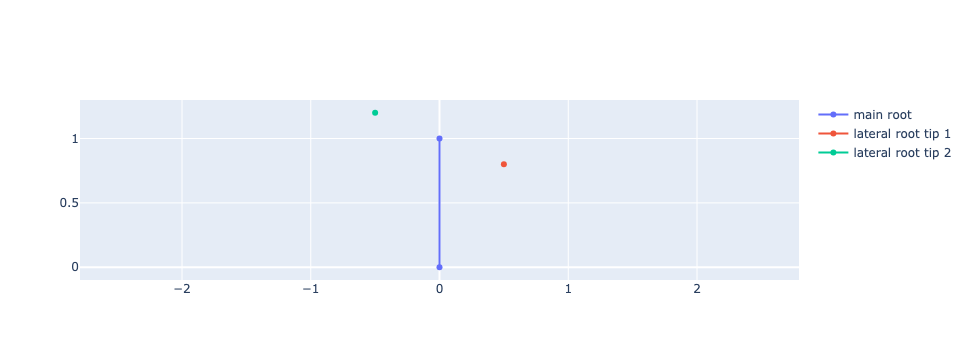

In [3]:
fig = go.Figure()
fig.add_trace(main)
fig.add_trace(pq)
fig.add_trace(pq2)
#fig.update_xaxes(range=[-1, 1])
#fig.update_yaxes(range=[-1.05, 0.05])

fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1
)
fig.show()

In [4]:
def critical_points(G, alpha, tmin=pylab.inf, tmax=0):
    G_squared = G ** 2
    p_squared = p ** 2
    alpha2 = 2 * alpha
    alpha_squared = alpha ** 2
    denominator = alpha2 - alpha_squared
    radicand = G_squared * p_squared + (1 / denominator)
    radical = pylab.sqrt(radicand)
    bstar_plus = (-G * p) + (1 - alpha) * radical
    bstar_minus = (-G * p) - (1 - alpha) * radical
    tstar1 = (-G * p_squared) + q - p * bstar_plus
    tstar2 = (-G * p_squared) + q - p * bstar_minus

    print("t*", tstar1, tstar2)
    
    critical_points = [tmin, tmax]
    if tstar1 >= tmin and tstar1 <= tmax:
        critical_points.append(tstar1)
    if tstar2 >= tmin and tstar2 <= tmax:
        critical_points.append(tstar2)
        
    return critical_points

In [5]:
def sec(theta):
    return 1 / pylab.cos(theta)

def tan(theta):
    return pylab.tan(theta)

In [6]:
def evaluate_solution(G, alpha, p, q, t):
    p_squared = p ** 2
    numerator = q - (G * p_squared) - t
    frac = numerator / p
    theta0 = pylab.arctan(frac)
    thetap = pylab.arctan((2 * G * p) + frac)

    def antiderivative(theta):
        const = 1 / (4 * G)
        term1 = sec(theta) * tan(theta)
        term2 = pylab.log(pylab.abs(sec(theta) + tan(theta)))
        return const * (term1 + term2)

    def differential_length(x):
        return pylab.sqrt(1 + ((2 * G * x) + (frac)) ** 2)

    def wiring_approx():
        return integrate.quad(differential_length, 0, p)

    wiring = None
    if G != 0:
        wiring = antiderivative(max(theta0, thetap)) - antiderivative(min(theta0, thetap))
    else:
        wiring = euclidean((0, t), (p, q))
    delay = wiring + abs(t)
    return (alpha * wiring) + ((1 - alpha) * delay)

In [7]:
def add_example(G, alpha, p, q, fig):
    a = G
    best_cost = pylab.inf
    best_t = None
    y_opt = None
    crit_points = critical_points(G, alpha, tmin, tmax)
    print(crit_points)
    x_opt = pylab.linspace(min(0, p), max(0, p))
    for t in crit_points:
        cost = evaluate_solution(G, alpha, p, q, t)
        print(t, cost, best_cost)
        if cost < best_cost:
            best_cost = cost
            best_t = t
            b = ((-G * (p ** 2)) + q - t) / p
            c = t
            y_opt = a * x_opt ** 2 + b * x_opt + c
        
    opt_line = go.Scatter(x=x_opt, y=y_opt, mode="lines", name = "G = %0.2f %s = %0.2f" % (G, chr(945), alpha))
    
    
    fig.add_trace(opt_line)
    

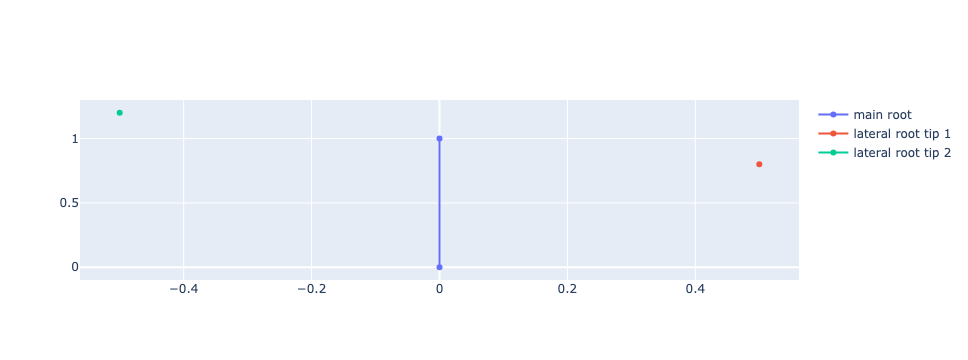

In [8]:
example_fig = go.Figure()
example_fig.add_trace(main)
example_fig.add_trace(pq)
example_fig.add_trace(pq2)

In [9]:
add_example(1, 0.1, p2, q2, example_fig)

t* -0.25660516451710125 1.8566051645171013
[0, 1]
0 1.3012071466569368 inf
1 1.4550064837499581 1.3012071466569368


In [10]:
add_example(1, 0.3, p2, q2, example_fig)

t* 0.2795952743956177 1.3204047256043823
[0, 1, 0.2795952743956177]
0 1.3012071466569366 inf
1 1.2550064837499582 1.3012071466569366
0.2795952743956177 1.2454860507159184 1.2550064837499582


In [11]:
add_example(1, 0.5, p2, q2, example_fig)

t* 0.48542356519705215 1.1145764348029479
[0, 1, 0.48542356519705215]
0 1.3012071466569368 inf
1 1.0550064837499582 1.3012071466569368
0.48542356519705215 1.1188879477523375 1.0550064837499582


In [12]:
add_example(0, 0.5, p, q, example_fig)

t* 0.5113248654051872 1.088675134594813
[0, 1, 0.5113248654051872]
0 0.9433981132056604 inf
1 1.0385164807134504 0.9433981132056604
0.5113248654051872 0.8330127018922193 0.9433981132056604


In [13]:
add_example(0.5, 0.5, p, q, example_fig)

t* 0.504636523359212 1.095363476640788
[0, 1, 0.504636523359212]
0 0.944178832329726 inf
1 1.0426745045893036 0.944178832329726
0.504636523359212 0.8363722168952921 0.944178832329726


In [14]:
add_example(2.5, 0.5, p, q, example_fig)

t* 0.3745712946528722 1.225428705347128
[0, 1, 0.3745712946528722]
0 0.9663864789185007 inf
1 1.134547484583317 0.9663864789185007
0.3745712946528722 0.9067805811353572 0.9663864789185007


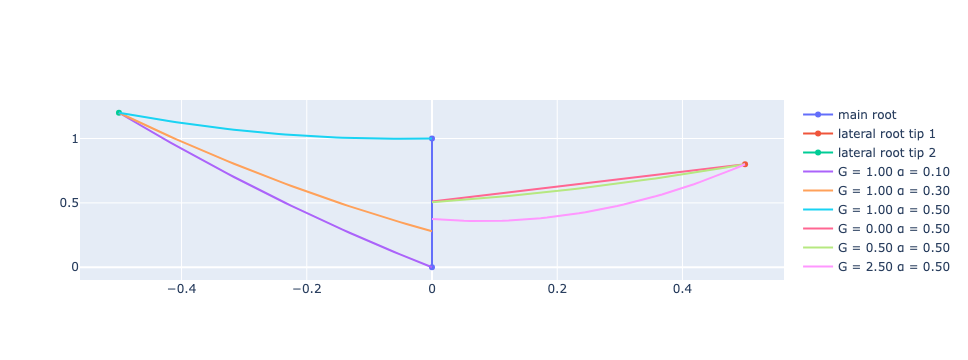

In [19]:
# example_fig.update_yaxes(
#     scaleanchor = "x",
#     scaleratio = 1
# )
width_mm = 174
width_pixels = 657.63779528
example_fig.update_layout(
    width=width_pixels)
example_fig.show()

In [26]:
scale = (width_mm / 25.4) / (700 / 300)
scale

2.935883014623172

In [28]:
pio.write_image(example_fig, 'illustrative_example.eps', format='eps', scale=scale)